In [1]:
import os
import json
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [2]:
with open('dataset.json', 'r') as f:
    dataset = json.load(f)
    
os.makedirs('images', exist_ok=True)

In [8]:
total_images = 0
data = {
    'name': {},
    'brand': {},
    'category': {},
    'gender' : {},
}

for item_id, item_data in dataset.items():
    for key, info in item_data['info'].items():
        if info in data[key]:
            data[key][info] += 1
        else:
            data[key][info] = 1
    total_images += len(item_data['images'])
    
print('Total shoes:', len(dataset))
print('Total images:', total_images)
for key, value in data.items():
    print('Total {}: {}'.format(key, len(value)))

Total shoes: 71957
Total images: 505080
Total name: 28271
Total brand: 643
Total category: 11
Total gender: 15


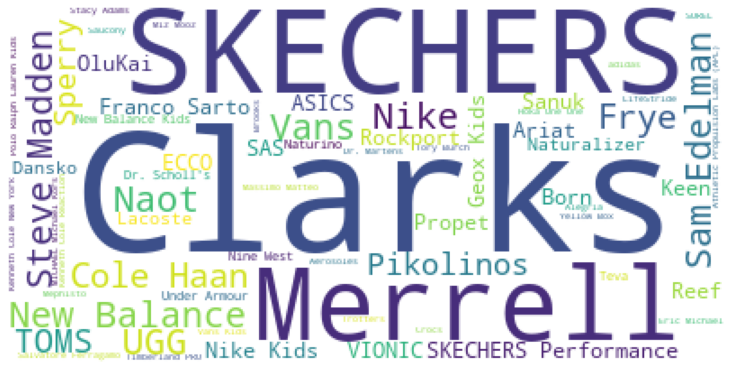

In [4]:
wordcloud = WordCloud(background_color='white')
wordcloud.generate_from_frequencies(frequencies=data['brand'])

plt.figure(figsize = (10, 6), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0)

#plt.title('Brands')
plt.savefig(os.path.join('images', 'brands.png'))
plt.show() 

In [5]:
genders = {
    'general': 0,
    'men' : 0,
    'women': 0,
    'kids': 0,
    'boys': 0,
    'girls': 0,
}
for key, value in data['gender'].items():
    if key in genders:
        genders[key] = value
    else:
        if 'women' in key.lower():
            if key == '["Men","Women"]':
                genders['general'] += value
            else:
                genders['women'] += value
        elif 'men' in key.lower():
            genders['men'] += value
        else:
            genders['general'] += value

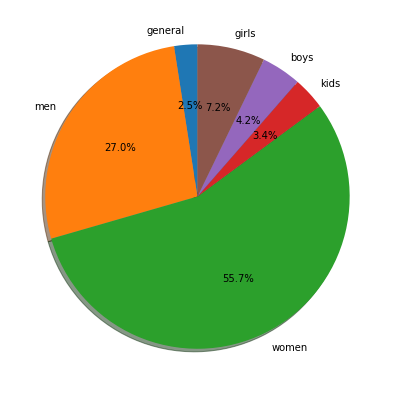

In [6]:
plt.figure(figsize=(7, 7))
plt.pie(list(genders.values()),
        labels=list(genders.keys()),
        shadow=True, startangle=90, autopct='%1.1f%%')
#plt.title('Genders')
plt.savefig(os.path.join('images', 'genders.png'), bbox_inches='tight')
plt.show()

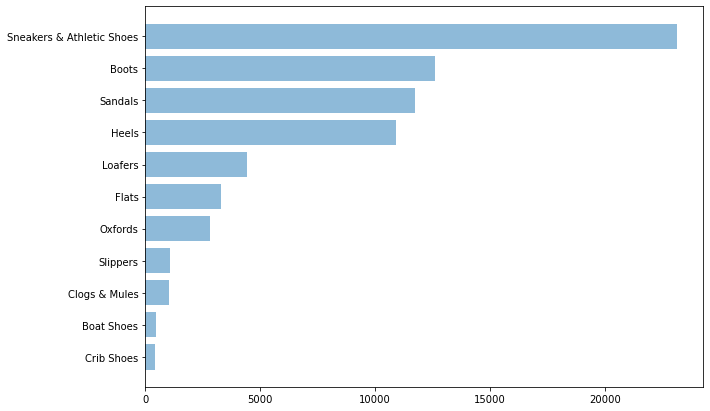

In [7]:
res = {k: v for k, v in sorted(data['category'].items(), key=lambda x : x[1])}

keys = list(res.keys())
values = list(res.values())

plt.figure(figsize=(10, 7))
plt.barh(range(len(res)), values,
        align='center', alpha=0.5)
plt.yticks(range(len(res)), keys)

#plt.title('Categories')
plt.savefig(os.path.join('images', 'categories.png'), bbox_inches='tight')
plt.show()